<a href="https://colab.research.google.com/github/andreyxz2000/Test/blob/main/Svetozarov%20Andrey/Y8_%D0%B4%D1%8B%D1%80%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
!pip install wget
import wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=75de15c3e27b975235c13fef3a86d197175c204d43c4e9e2cacd22ec997bc42f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.9/608.9 kB 7.0 MB/s eta 0:00:00


In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model



100%|██████████| 6.23M/6.23M [00:00<00:00, 15.1MB/s]


In [13]:
# Train the model
results = model.train(data="/content/drive/MyDrive/Учебные БД/data/my_config.yaml", imgsz=800, batch=8, epochs=50, plots=True)

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Учебные БД/data/my_config.yaml, epochs=50, patience=50, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [14]:
 model.val(conf=0.5)
 # or you can set the data you want to val
 model.val(data="/content/drive/MyDrive/Учебные БД/data/my_config.yaml", conf=0.5)

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Учебные БД/data/labels/val.cache... 17 images, 1 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.02s/it]
                   all         17        321      0.786      0.171      0.476      0.261
Speed: 5.7ms preprocess, 656.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
val: Scanning /content/drive/MyDrive/Учебные БД/data/labels/val.cache... 17 images, 1 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab2e420f2e0>
fitness: 0.2826741040200295
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.26122])
names: {0: 'hole'}
plot: True
results_dict: {'metrics/precision(B)': 0.7857142857142857, 'metrics/recall(B)': 0.17133956386292834, 'metrics/mAP50(B)': 0.4757756849627053, 'metrics/mAP50-95(B)': 0.26121837280417665, 'fitness': 0.2826741040200295}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 5.520273657406078, 'inference': 524.956044028787, 'loss': 0.00044878791360294115, 'postprocess': 0.4795018364401425}

In [15]:
from IPython.display import Image


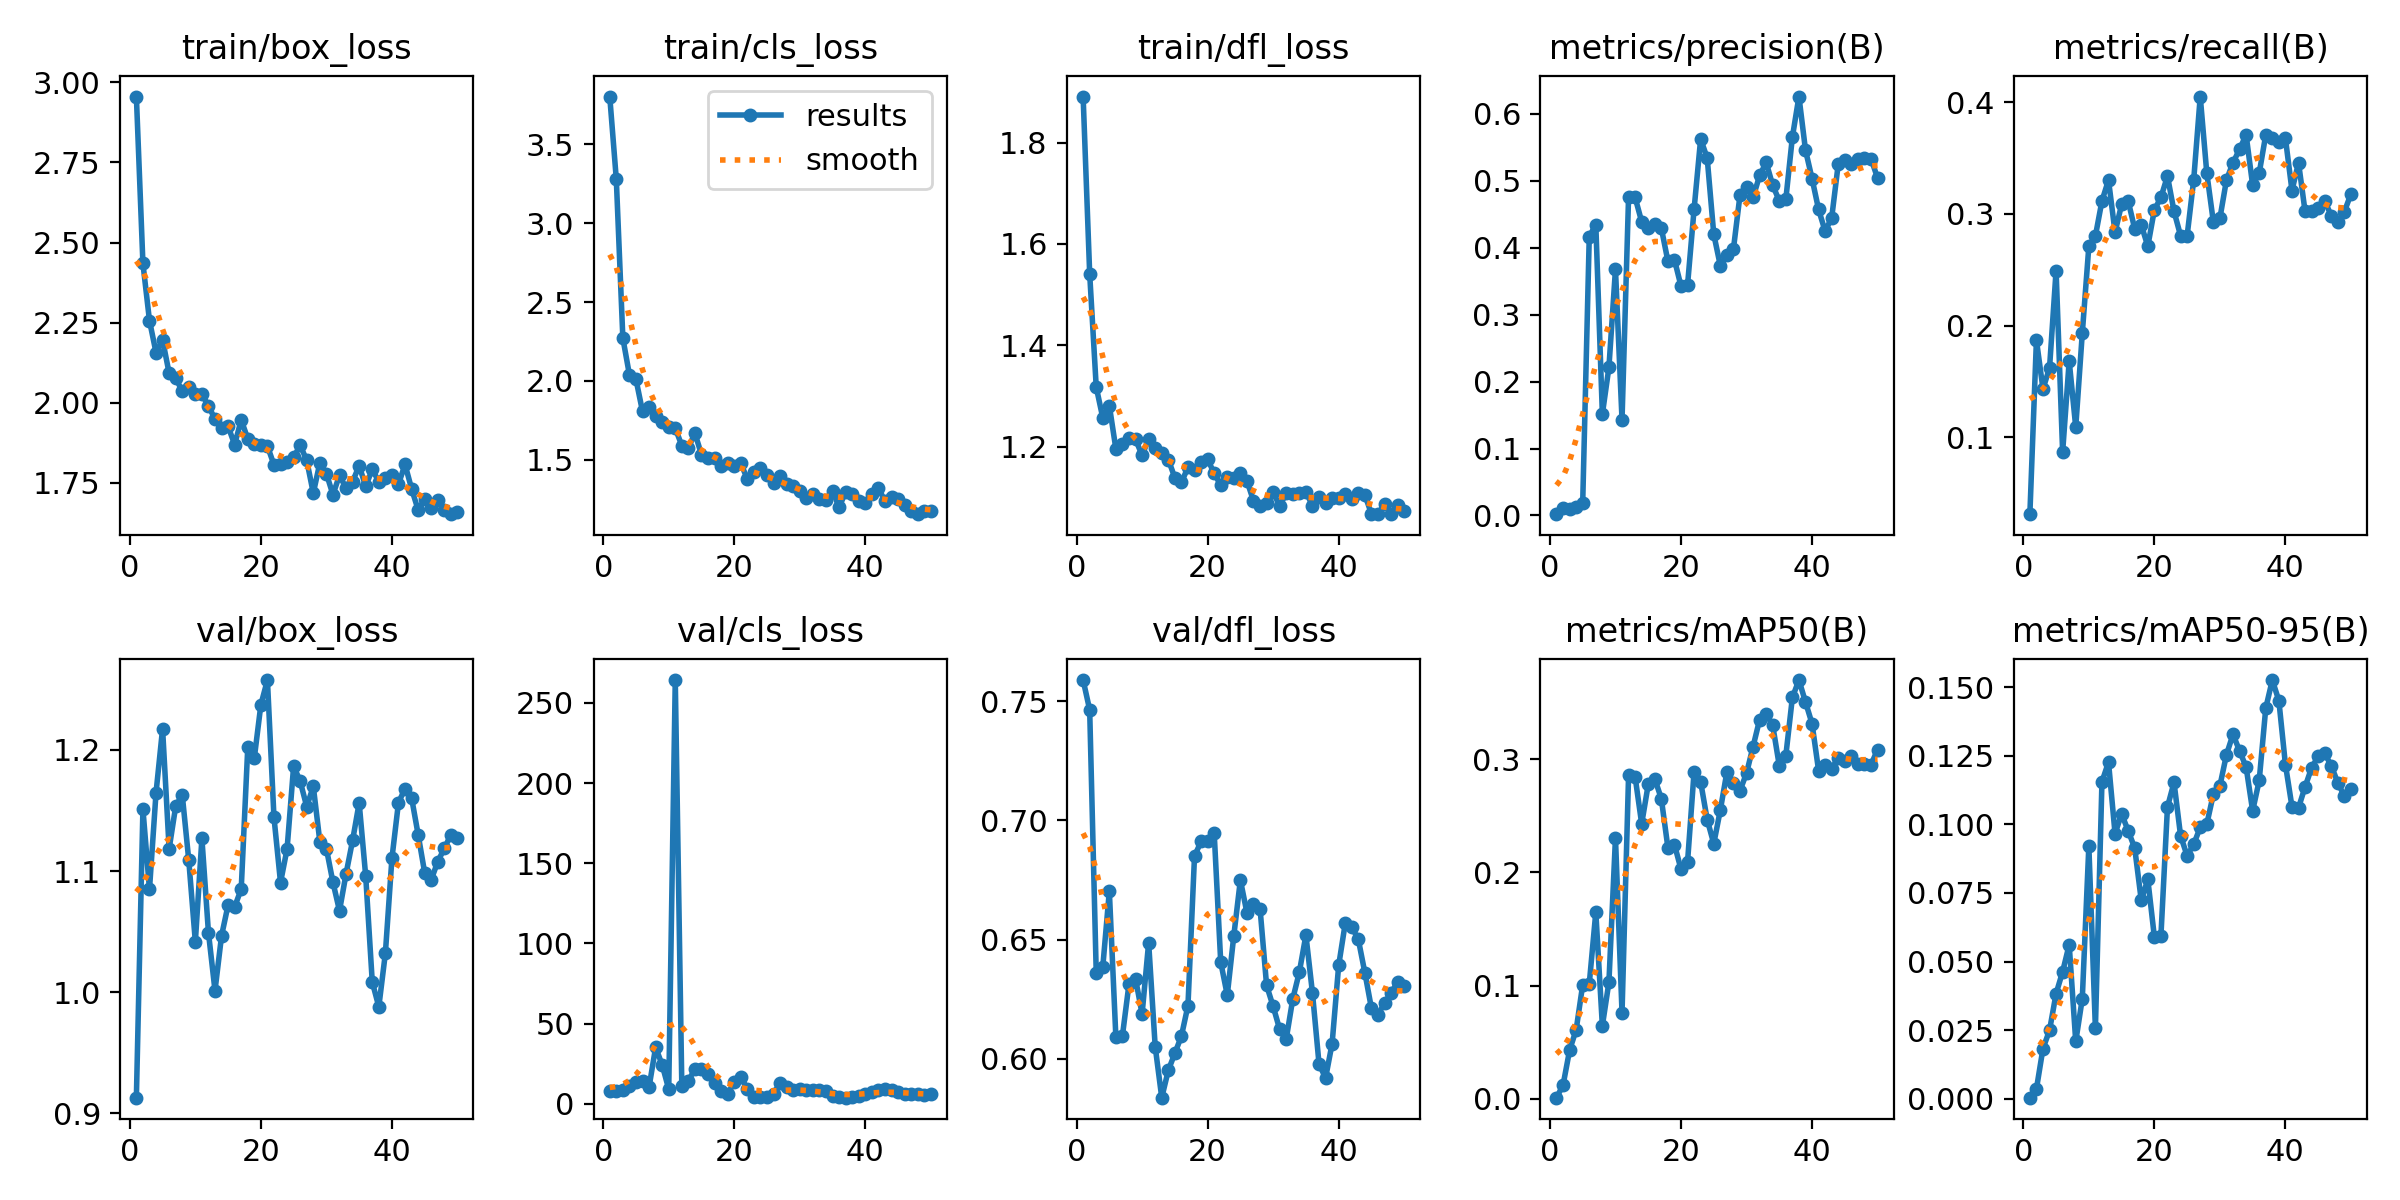

In [17]:
Image(filename='/content/runs/detect/train4/results.png', height=600)

In [18]:
model = YOLO("./runs/detect/train4/weights/best.pt")

In [19]:
import os
import zipfile
import requests


In [20]:
data_dir = "/content/test_data"  # Путь к папке с новыми тестовыми данными
if not os.path.exists(data_dir):
    os.makedirs(data_dir)


In [21]:
zip_url = "https://github.com/Untick/insects_detection/raw/main/_data/markup4OD/Cabbage_different_angle_yolov8_84_frames.zip"
zip_filename = os.path.join(data_dir, "Cabbage_different_angle_yolov8_84_frames.zip")

response = requests.get(zip_url)
with open(zip_filename, "wb") as zip_file:
    zip_file.write(response.content)


In [22]:
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(data_dir)


In [24]:
model = YOLO("./runs/detect/train4/weights/best.pt")
results = model.predict(source="/content/test_data/Data_84_frames/images/42_jpeg.rf.38306232d866ee618dc97cec34d86ef5.jpg", save=True, show=True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/test_data/Data_84_frames/images/42_jpeg.rf.38306232d866ee618dc97cec34d86ef5.jpg: 800x800 40 holes, 361.4ms
Speed: 7.0ms preprocess, 361.4ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict


In [25]:
print("Bounding box coordinates:", results[0].boxes.xyxy)
print("Log probability of assigned class", results[0].boxes.conf)
print("Assigned class:", results[0].boxes.cls)


Bounding box coordinates: tensor([[150.6922, 229.2347, 169.3302, 273.8672],
        [ 88.6434, 228.8071, 103.7874, 255.3860],
        [126.9346, 173.9768, 165.9886, 228.6335],
        [105.7550, 138.2898, 152.2341, 191.8267],
        [302.1516, 200.0955, 308.8751, 212.6661],
        [155.3679, 101.9498, 174.3665, 127.1757],
        [609.3419, 221.0761, 621.2903, 244.9656],
        [111.6803,   2.3436, 127.8709,  23.6580],
        [203.6304, 226.0242, 210.2679, 237.8361],
        [  5.3951, 143.4544,  15.1015, 167.2822],
        [278.8842, 150.4913, 289.3183, 174.8146],
        [313.0780, 203.5938, 324.2015, 227.7823],
        [568.1163,   0.0000, 583.8939,  39.3507],
        [293.1515, 223.9271, 306.8181, 241.1580],
        [201.2697, 116.5287, 214.3513, 141.4860],
        [161.2735, 144.5936, 172.4258, 158.5175],
        [552.5138, 468.6037, 564.3425, 487.4287],
        [319.6887, 160.3592, 335.8362, 196.9957],
        [561.3999, 380.4061, 571.8165, 400.3846],
        [207.4693,  42.5

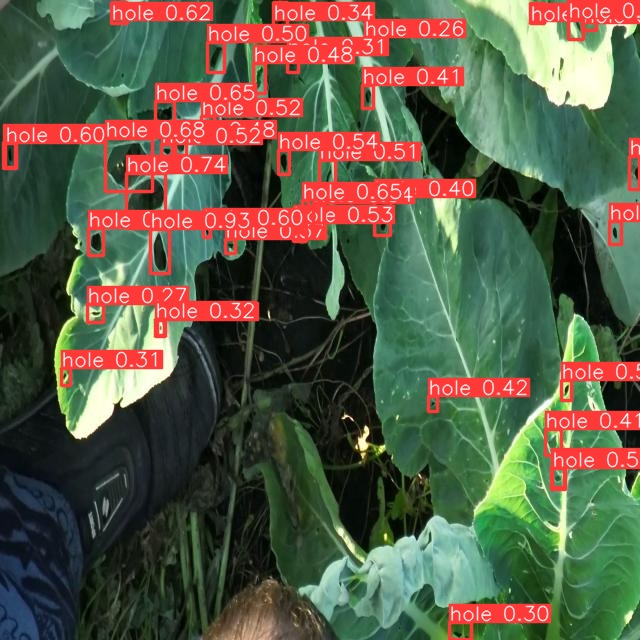

In [27]:
Image(filename='/content/runs/detect/predict/42_jpeg.rf.38306232d866ee618dc97cec34d86ef5.jpg', height=600)